# ------------------------ LINEAR REGRESSION : MULTIVARIENT -------------------------

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
life_exp = pd.read_csv("Life Expectancy Data.csv")

In [144]:
life_exp['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [145]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [146]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [147]:
life_exp.columns = list(x.strip() for x in life_exp.columns)
# Stripping the extra space as having issue addressing the columns

In [148]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Visualizaton and  Preprossing -------

###  Visualising Correlation Matrix using Heatmap

In [149]:
len(life_exp.columns.sort_values())

22

In [150]:
X_Cols = life_exp.corr().columns.sort_values()
len(X_Cols)

20

In [151]:
life_exp['Country'].nunique(),life_exp['Status'].nunique()

(193, 2)

<AxesSubplot:>

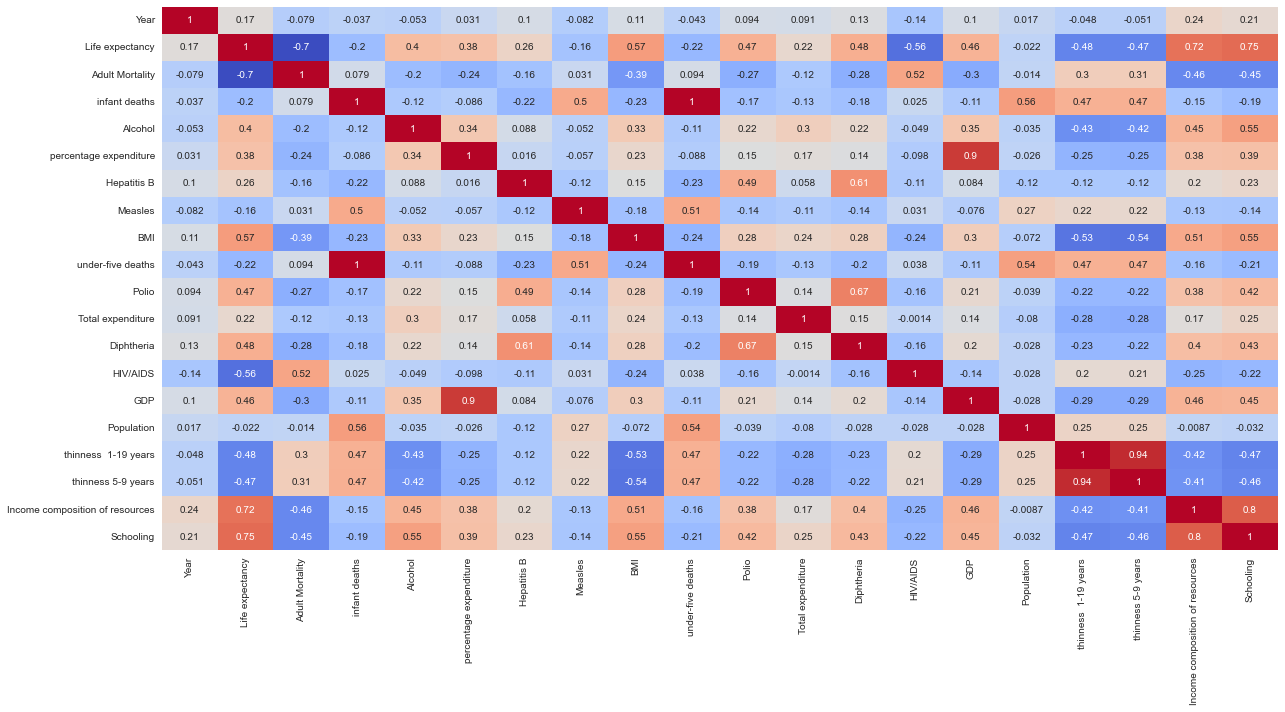

In [152]:
plt.figure(figsize=(20,10))
sns.heatmap(life_exp.corr(),cmap="coolwarm",annot=True,cbar=False)

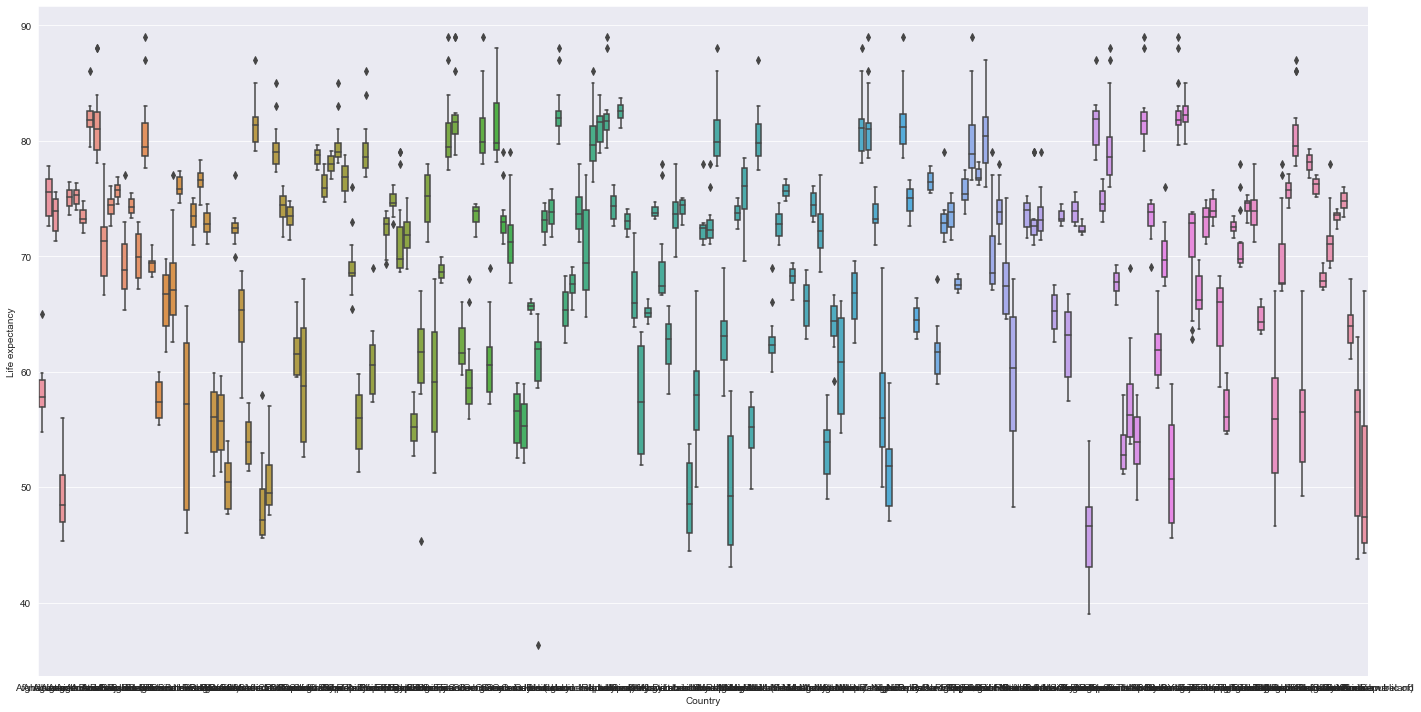

In [153]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x='Country',y='Life expectancy',data=life_exp)
plt.tight_layout()

##### Missing 2 attributes in the new dataframe(df), Country and Status. We will not add Countries as there are many values and encoding them increases the complexity.Also the data is spread out along the life expectancy. Heance only status is added which is one hot encoded dropping its first column.

In [154]:
new_df = pd.get_dummies(data = life_exp,columns=['Status'],drop_first=True)  #one hot encoding of Status attr
# To reduce dimensions, dropping the first col of dummies

new_df.drop(axis=1,columns=['Country'],inplace=True)
new_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1


<AxesSubplot:>

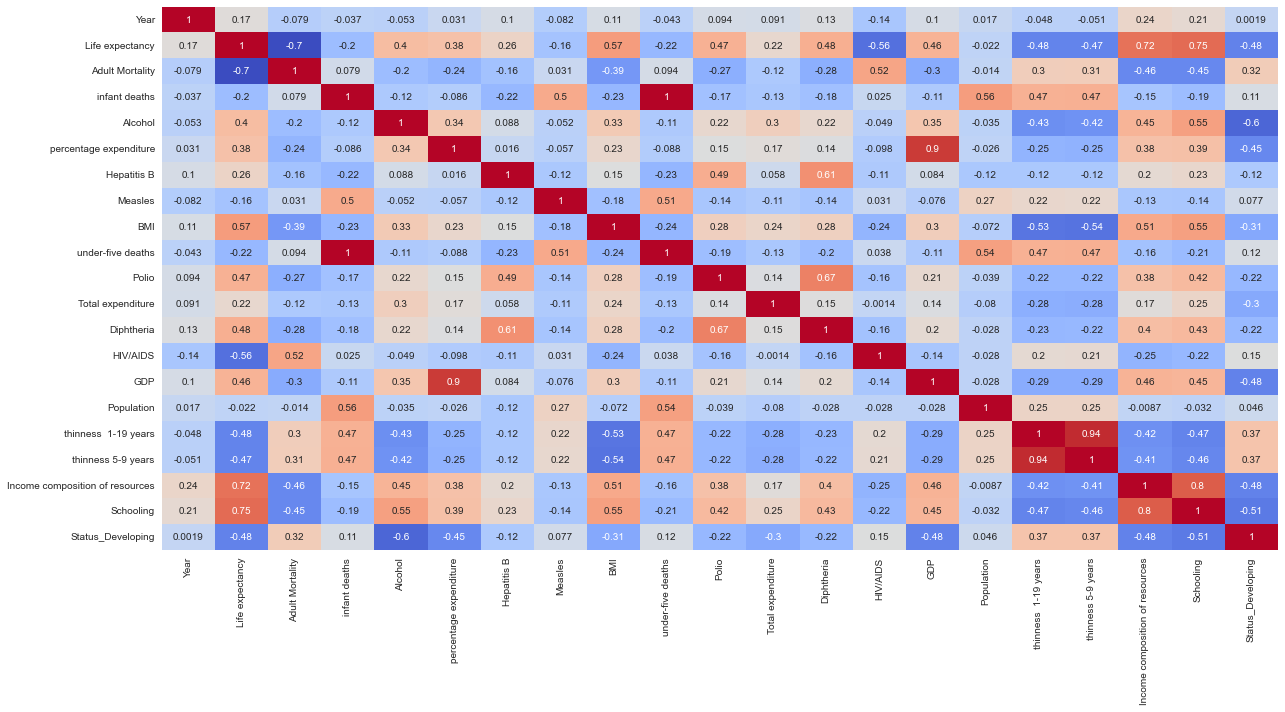

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),cmap="coolwarm",annot=True,cbar=False)

#### INFERENCE from above Hearmap : 
#### Cols infant deaths,percentage expenditure,thinness  1-19 years,Income composition of resources have high correlation with other attributes, hence deteing them

In [156]:
new_df.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [157]:
drop_cols_name = ['infant deaths','percentage expenditure', 'thinness  1-19 years',
                               'Income composition of resources']
new_df.drop(axis=1,columns=drop_cols_name,inplace=True)

<AxesSubplot:>

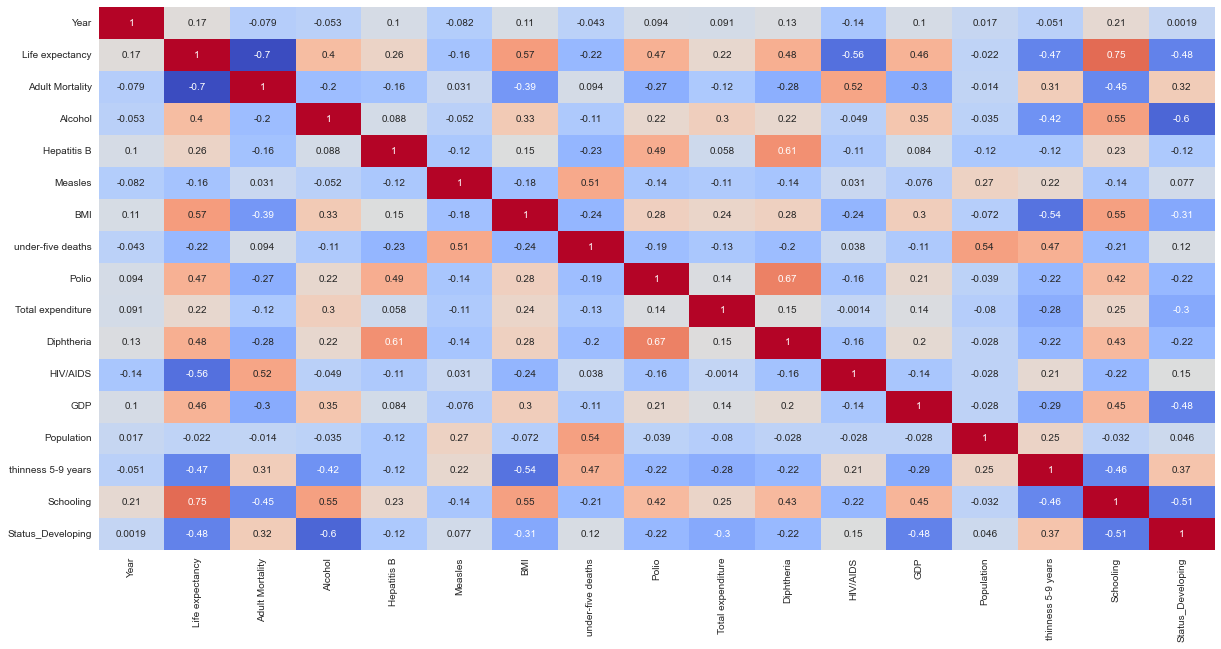

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),cmap="coolwarm",annot=True,cbar=False)

### Visualising Null Value Attributes and Handeling them :

<AxesSubplot:>

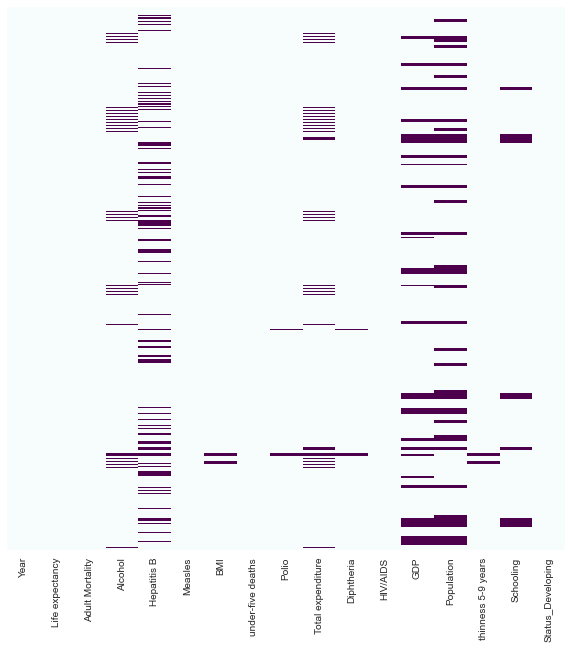

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.isna(),yticklabels=False,cbar=False,cmap='BuPu')

In [160]:
new_df.isnull().sum() # Count of Null

Year                    0
Life expectancy        10
Adult Mortality        10
Alcohol               194
Hepatitis B           553
Measles                 0
BMI                    34
under-five deaths       0
Polio                  19
Total expenditure     226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness 5-9 years     34
Schooling             163
Status_Developing       0
dtype: int64

In [161]:
len(new_df)

2938

In [162]:
new_df.corr()['Life expectancy'].sort_values()

Adult Mortality      -0.696359
HIV/AIDS             -0.556556
Status_Developing    -0.482136
thinness 5-9 years   -0.471584
under-five deaths    -0.222529
Measles              -0.157586
Population           -0.021538
Year                  0.170033
Total expenditure     0.218086
Hepatitis B           0.256762
Alcohol               0.404877
GDP                   0.461455
Polio                 0.465556
Diphtheria            0.479495
BMI                   0.567694
Schooling             0.751975
Life expectancy       1.000000
Name: Life expectancy, dtype: float64

### INFERENCE : 
Life Expectancy attributed's null value rows going to be deleted as we dont want to replace it with other values as its the output

Polulation, HepatitisB attribute columns will be deleted as it accounts for 20% of the given data and they do not affect the output attribute

Schooling cannot be deleted as its strongly corelated with the output

In [163]:
#Dropping Columns
drop_cols_name = ['Hepatitis B','Population']
new_df.drop(axis=1,columns=drop_cols_name,inplace=True)

In [164]:
#Dropping Rows with Life exp as NULL
droprows = new_df[new_df['Life expectancy'].isna()].index
new_df.drop(axis=0,index=droprows,inplace=True)
new_df['Life expectancy'].isna().sum()

0

In [165]:
#Dropping Rows with Schooling as NULL
droprows = new_df[new_df['Schooling'].isna()].index
new_df.drop(axis=0,index=droprows,inplace=True)

new_df['Schooling'].isna().sum()

0

In [166]:
new_df.isnull().sum() # Count of Null

Year                    0
Life expectancy         0
Adult Mortality         0
Alcohol               184
Measles                 0
BMI                    32
under-five deaths       0
Polio                  19
Total expenditure     186
Diphtheria             19
HIV/AIDS                0
GDP                   286
thinness 5-9 years     32
Schooling               0
Status_Developing       0
dtype: int64

In [167]:
new_df[['BMI','Polio','Alcohol','Total expenditure','GDP','Diphtheria','thinness 5-9 years']].describe()

,BMI,Polio,Alcohol,Total expenditure,GDP,Diphtheria,thinness 5-9 years
count,2736.000000,2749.000000,2584.000000,2582.000000,2482.000000,2749.000000,2736.000000
mean,38.509430,82.742088,4.520368,5.867084,7502.909435,82.729720,4.921674
std,19.857229,23.108000,4.007478,2.375854,14288.688548,23.217096,4.570425
min,1.000000,3.000000,0.010000,0.370000,1.681350,2.000000,0.100000
25%,19.375000,78.000000,0.850000,4.250000,464.452290,79.000000,1.600000
50%,44.000000,93.000000,3.695000,5.705000,1770.253970,93.000000,3.400000
75%,56.100000,97.000000,7.495000,7.460000,5939.610244,97.000000,7.300000
max,77.600000,99.000000,17.870000,14.390000,119172.741800,99.000000,28.600000


In [168]:
#Replacing NULL Values : 
new_df['BMI'].fillna(38.5,inplace=True)
new_df['BMI'].isna().sum()

0

In [169]:
#Replacing NULL Values : 
new_df['Polio'].fillna(82.7,inplace=True)
new_df['Polio'].isna().sum()

0

In [170]:
#Replacing NULL Values : 
new_df['Alcohol'].fillna(4,inplace=True)
new_df['Alcohol'].isna().sum()

0

In [171]:
#Replacing NULL Values : 
new_df['Total expenditure'].fillna(5.7,inplace=True)
new_df['Total expenditure'].isna().sum()

0

In [172]:
#Dropping Rows with GDP as NULL as there is a lot of variation
droprows = new_df[new_df['GDP'].isna()].index
new_df.drop(axis=0,index=droprows,inplace=True)

new_df['GDP'].isna().sum()

0

In [173]:
#Replacing NULL Values : 
new_df['Diphtheria'].fillna(82,inplace=True)
new_df['Diphtheria'].isna().sum()

0

In [174]:
#Replacing NULL Values : 
new_df['thinness 5-9 years'].fillna(4,inplace=True)
new_df['thinness 5-9 years'].isna().sum()

0

In [175]:
new_df.isnull().sum() # Count of Null

Year                  0
Life expectancy       0
Adult Mortality       0
Alcohol               0
Measles               0
BMI                   0
under-five deaths     0
Polio                 0
Total expenditure     0
Diphtheria            0
HIV/AIDS              0
GDP                   0
thinness 5-9 years    0
Schooling             0
Status_Developing     0
dtype: int64

##### Adding one more feature to X ( input) to make sure the matrix multiplication with W will have the Bias term included

In [176]:
new_df['Bias'] = np.ones(len(new_df))

In [177]:
new_df.head()

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Schooling,Status_Developing,Bias
0,2015,65.0,263.0,0.01,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.3,10.1,1,1.0
1,2014,59.9,271.0,0.01,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,10.0,1,1.0
2,2013,59.9,268.0,0.01,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,9.9,1,1.0
3,2012,59.5,272.0,0.01,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,18.0,9.8,1,1.0
4,2011,59.2,275.0,0.01,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,9.5,1,1.0


### Scaling Data : applying normalization techniques

In [199]:
df_min_max_scaled = new_df.copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
df_min_max_scaled.head()

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Schooling,Status_Developing,Bias
0,1.000000,0.544592,0.362881,0.0,0.005439,0.232283,0.0332,0.031250,0.555635,0.649485,0.0,0.004889,0.603509,0.487923,1.0,NaN
1,0.933333,0.447818,0.373961,0.0,0.002319,0.225722,0.0344,0.572917,0.557061,0.618557,0.0,0.005127,0.610526,0.483092,1.0,NaN
2,0.866667,0.447818,0.369806,0.0,0.002027,0.219160,0.0356,0.614583,0.553495,0.639175,0.0,0.005287,0.617544,0.478261,1.0,NaN
3,0.800000,0.440228,0.375346,0.0,0.013135,0.212598,0.0372,0.666667,0.581312,0.670103,0.0,0.005608,0.628070,0.473430,1.0,NaN
4,0.733333,0.434535,0.379501,0.0,0.014200,0.207349,0.0388,0.677083,0.534950,0.680412,0.0,0.000519,0.635088,0.458937,1.0,NaN


In [200]:
df_min_max_scaled['Bias'] = np.ones(len(df_min_max_scaled))
df_min_max_scaled.head()

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Schooling,Status_Developing,Bias
0,1.000000,0.544592,0.362881,0.0,0.005439,0.232283,0.0332,0.031250,0.555635,0.649485,0.0,0.004889,0.603509,0.487923,1.0,1.0
1,0.933333,0.447818,0.373961,0.0,0.002319,0.225722,0.0344,0.572917,0.557061,0.618557,0.0,0.005127,0.610526,0.483092,1.0,1.0
2,0.866667,0.447818,0.369806,0.0,0.002027,0.219160,0.0356,0.614583,0.553495,0.639175,0.0,0.005287,0.617544,0.478261,1.0,1.0
3,0.800000,0.440228,0.375346,0.0,0.013135,0.212598,0.0372,0.666667,0.581312,0.670103,0.0,0.005608,0.628070,0.473430,1.0,1.0
4,0.733333,0.434535,0.379501,0.0,0.014200,0.207349,0.0388,0.677083,0.534950,0.680412,0.0,0.000519,0.635088,0.458937,1.0,1.0


In [219]:
X = np.array(df_min_max_scaled.drop(axis=1,columns='Life expectancy'))
Y = np.array(df_min_max_scaled['Life expectancy'])
X,Y

(array([[1.        , 0.36288089, 0.        , ..., 0.48792271, 1.        ,
         1.        ],
        [0.93333333, 0.37396122, 0.        , ..., 0.48309179, 1.        ,
         1.        ],
        [0.86666667, 0.36980609, 0.        , ..., 0.47826087, 1.        ,
         1.        ],
        ...,
        [0.13333333, 0.09972299, 0.2474804 , ..., 0.48309179, 1.        ,
         1.        ],
        [0.06666667, 0.94875346, 0.09574468, ..., 0.47342995, 1.        ,
         1.        ],
        [0.        , 0.91966759, 0.09350504, ..., 0.47342995, 1.        ,
         1.        ]]),
 array([0.54459203, 0.44781784, 0.44781784, ..., 0.16129032, 0.17077799,
        0.18406072]))

In [214]:
X.shape,Y.shape

((2482, 15), (2482,))

## ---- Linear Regression for Multivaient : Closed Form Solution ----

In [215]:
def CostFunction(Y_Pred,Y):
    sum=0
    leng = len(Y_Pred)
    for i in range(leng):
        sum+=(Y_Pred[i]-Y[i])**2
    return (sum/len(Y))

def plot_predication_Truth(Y,Y_Pred):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(10,5))
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(Y_Pred,Y)
    axes.set_ylabel("Life Expectancy - Truth")
    axes.set_xlabel("Life Expectancy - Predicted ")
    axes.set_title("Linear Regression")

def LinearRegression_ClosedForm(X,Y):
    W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
    leng = len(X)
    Y_Pred = list()
    for i in range(leng):
        y_pred = np.matmul(W.T,X[i])
        Y_Pred.append(y_pred)
    return Y_Pred

In [216]:
Y_Pred = LinearRegression_ClosedForm(X,Y)

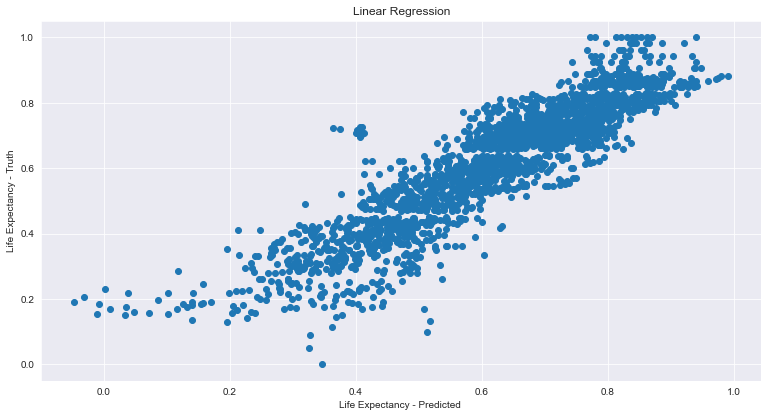

In [217]:
plot_predication_Truth(Y,Y_Pred)

In [218]:
print("Loss using - Mean Square Error : ",(CostFunction(Y,Y_Pred)))


Loss using - Mean Square Error :  0.00597311113679171


### INFERENCE : 
The Graph between Truth v/s predicted is scattered linerally. Hence the predictions are almost correct

## ---- Linear Regression for Multivarient : Gradient Descend  -----

<!-- X_df = new_df.drop(axis=1,columns=['Life expectancy','Adult Mortality'])
X_df.head() -->

In [238]:
df_min_max_scaled = new_df.copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

df_min_max_scaled['Bias'] = np.ones(len(df_min_max_scaled)) # As Bias gets Scaled as NaN ( As it gets divided by 0)
df_min_max_scaled.head()

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Schooling,Status_Developing,Bias
0,1.000000,0.544592,0.362881,0.0,0.005439,0.232283,0.0332,0.031250,0.555635,0.649485,0.0,0.004889,0.603509,0.487923,1.0,1.0
1,0.933333,0.447818,0.373961,0.0,0.002319,0.225722,0.0344,0.572917,0.557061,0.618557,0.0,0.005127,0.610526,0.483092,1.0,1.0
2,0.866667,0.447818,0.369806,0.0,0.002027,0.219160,0.0356,0.614583,0.553495,0.639175,0.0,0.005287,0.617544,0.478261,1.0,1.0
3,0.800000,0.440228,0.375346,0.0,0.013135,0.212598,0.0372,0.666667,0.581312,0.670103,0.0,0.005608,0.628070,0.473430,1.0,1.0
4,0.733333,0.434535,0.379501,0.0,0.014200,0.207349,0.0388,0.677083,0.534950,0.680412,0.0,0.000519,0.635088,0.458937,1.0,1.0


In [241]:
X = np.array(df_min_max_scaled.drop(axis=1,columns='Life expectancy'))
Y = np.array(df_min_max_scaled[['Life expectancy']])  
X.shape,Y.shape

((2482, 15), (2482, 1))

In [245]:
X

array([[1.        , 0.36288089, 0.        , ..., 0.48792271, 1.        ,
        1.        ],
       [0.93333333, 0.37396122, 0.        , ..., 0.48309179, 1.        ,
        1.        ],
       [0.86666667, 0.36980609, 0.        , ..., 0.47826087, 1.        ,
        1.        ],
       ...,
       [0.13333333, 0.09972299, 0.2474804 , ..., 0.48309179, 1.        ,
        1.        ],
       [0.06666667, 0.94875346, 0.09574468, ..., 0.47342995, 1.        ,
        1.        ],
       [0.        , 0.91966759, 0.09350504, ..., 0.47342995, 1.        ,
        1.        ]])

In [246]:
Y

array([[0.54459203],
       [0.44781784],
       [0.44781784],
       ...,
       [0.16129032],
       [0.17077799],
       [0.18406072]])

In [247]:
split_size = 0.7   #Split Size for Train Test split
split = int(len(X)*split_size)
X_Train=X[:split]
Y_Train=Y[:split]
X_Test=X[split:]
Y_Test=Y[split:]
print(len(X_Train),len(Y_Train),len(X_Test),len(Y_Test))

1737 1737 745 745


In [282]:
def CostFunction(Y_Pred,Y):
    sum=0
    leng = len(Y_Pred)
    for i in range(leng):
        sum+=(Y_Pred[i]-Y[i])**2
    return (sum/len(Y))

def plot_YPred_vs_YTest(Y_Pred,Y_Test):
    fig = plt.figure(figsize=(10,6))
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(Y_Pred,Y_Test,lw=1,label='Truth')
    axes.set_xlabel(" Y_Predicted ")
    axes.set_ylabel("Y_Truth ")
    axes.set_title("Linear Regression")
    axes.legend()
        
class LR:
    W=0
    def __init__(self,X):
        leng = len(X[0])
        self.W = np.zeros((leng,1))
 
    def find_Y_Pred(self,X,W):
       # print(W.T.shape,X.shape)
        Y_Pred = list()
        for i in range(len(X)):
            y_pred = np.dot(W.T,X[i])
            Y_Pred.append(y_pred) 
        return Y_Pred
    
    def partial_derivative_coeff(self,X,Y):
       # W_par_der = np.zeros(len(X[0]),1)
        #error = Y-np.matmul(X,self.W)
        sec_term = np.matmul(X,self.W)
        error =  np.subtract(Y,sec_term)
        W_par_der = -(np.matmul(X.T,error))

        return W_par_der

    def LinearRegression_GradientDesc(self,X,Y,step_size=0.0001,epochs=1000):
        
        cost_list = list()
        for i in range(epochs):
            W_par_der = self.partial_derivative_coeff(X,Y)

            W_new = self.W -  step_size * W_par_der
            Y_Pred = self.find_Y_Pred(X,W_new)
            
            cost_list.append(CostFunction(Y_Pred,Y))
            self.W = W_new
        
        self.plot_Cost_vs_Epoch(epochs,cost_list)
        print(cost_list[len(cost_list)-1])
       
    def Predict_LinearRegression_GradientDesc(self,X):
        Y_Pred = self.find_Y_Pred(X,self.W)
        return Y_Pred
    
    def plot_Cost_vs_Epoch(self,epochs,cost_List):
        fig = plt.figure(figsize=(10,6))
        axes = fig.add_axes([0,0,1,1])
        axes.plot(range(epochs),cost_List,lw=3)
        axes.set_xlabel(" Epochs ")
        axes.set_ylabel(" Cost ")
        axes.set_title("Cost vs Epoch during Training")
    

[0.00567383]


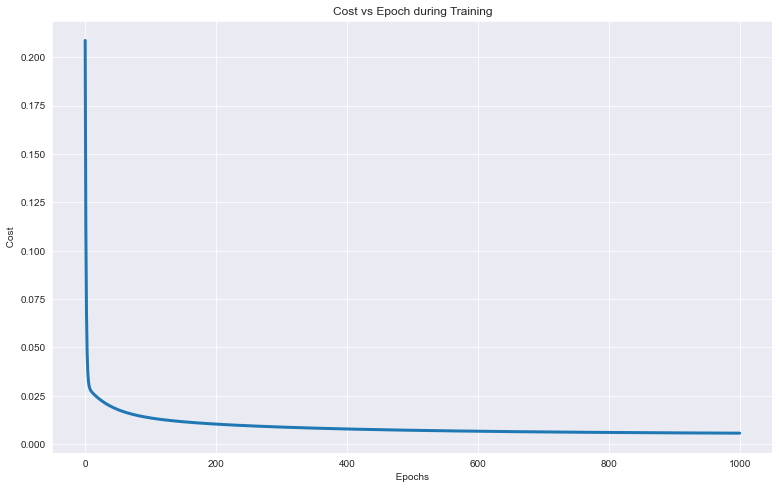

In [283]:
lr =  LR(X_Test)
lr.LinearRegression_GradientDesc(X_Test,Y_Test)

In [284]:
Y_Pred = lr.Predict_LinearRegression_GradientDesc(X_Test)

######  Since Y is of Dim N*1 so making it into a signle dim list for plotting : 

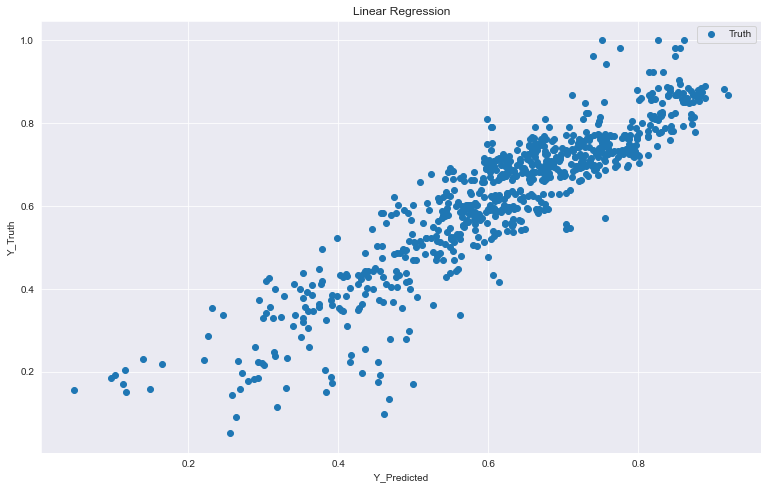

In [285]:
new_Y_Test = list( x for x in Y_Test)
plot_YPred_vs_YTest(Y_Pred,new_Y_Test)

#### The Scatter plot is almost a linear plot, heance the Predicted values and the true values are converging

In [286]:
print("Cost : Mean Square Error = ",CostFunction(Y_Pred,Y_Test)[0])

Cost : Mean Square Error =  0.005673825516128351


### INFERENCE : 
The plot between Truth v/s predicted is scattered linerally. Hence the predictions are almost correct

Note : 
    Overflow warning encountered even with low step_size(0.001) and epoch of 1000. Need more time to understand why and the instances
 